In [ ]:
# импорт модулей
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab2')

import numpy as np
import lab02_lib as lib

/content/drive/MyDrive/Colab Notebooks/is_lab2/lab02_lib.py:444: SyntaxWarning: invalid escape sequence '\X'
  hatch='/', label='Площадь |Xd| за исключением |Xt| (|Xd\Xt|)')
/content/drive/MyDrive/Colab Notebooks/is_lab2/lab02_lib.py:452: SyntaxWarning: invalid escape sequence '\X'
  facecolor='none', label='Площадь |Xt| за исключением |Xd| (|Xt\Xd|)')


## Задание 2

### 1) Изучить описание своего набора реальных данных, что он из себя представляет

Бригада 6 => набор данных Cardio. Это реальный набор данных, который состоит из измерений частоты сердечных сокращений плода и
сокращений матки на кардиотокограммах, классифицированных экспертами
акушерами. Исходный набор данных предназначен для классификации. В нем
представлено 3 класса: «норма», «подозрение» и «патология». Для обнаружения
аномалий класс «норма» принимается за норму, класс «патология» принимается за
аномалии, а класс «подозрение» был отброшен.

| Количество<br>признаков | Количество<br>примеров | Количество<br>нормальных примеров | Количество<br>аномальных примеров |
|-------------------------:|-----------------------:|----------------------------------:|-----------------------------------:|
| 21                       | 1764                   | 1655                               | 109                                |


### 2) Загрузить многомерную обучающую выборку реальных данных Cardio.txt.

In [ ]:
# загрузка обчуающей выборки
train = np.loadtxt('data/cardio_train.txt', dtype=float)

### 3) Вывести полученные данные и их размерность в консоли.

In [ ]:
print('train:\n', train)
print('train.shape:', np.shape(train))

train:
 [[ 0.00491231  0.69319077 -0.20364049 ...  0.23149795 -0.28978574
  -0.49329397]
 [ 0.11072935 -0.07990259 -0.20364049 ...  0.09356344 -0.25638541
  -0.49329397]
 [ 0.21654639 -0.27244466 -0.20364049 ...  0.02459619 -0.25638541
   1.1400175 ]
 ...
 [ 0.85144861 -0.91998844 -0.20364049 ...  0.57633422 -0.65718941
   1.1400175 ]
 [ 0.85144861 -0.91998844 -0.20364049 ...  0.57633422 -0.62378908
  -0.49329397]
 [ 1.0630827  -0.51148142 -0.16958144 ...  0.57633422 -0.65718941
  -0.49329397]]
train.shape: (1654, 21)


### 4) Создать и обучить автокодировщик с подходящей для данных архитектурой. Выбрать необходимое количество эпох обучения.

In [ ]:
# **kwargs
# verbose_every_n_epochs - отображать прогресс каждые N эпох (по умолчанию - 1000)
# early_stopping_delta - дельта для ранней остановки (по умолчанию - 0.01)
# early_stopping_value = значение для ранней остановки (по умолчанию -  0.0001)

from time import time

patience = 4000
start = time()
ae3_v1_trained, IRE3_v1, IREth3_v1 = lib.create_fit_save_ae(train,'out/AE3_V1.h5','out/AE3_v1_ire_th.txt',
100000, False, patience, early_stopping_delta = 0.001)
print("Время на обучение: ", time() - start)

Задать архитектуру автокодировщиков или использовать архитектуру по умолчанию? (1/2): 1
Задайте количество скрытых слоёв (нечетное число) : 7
Задайте архитектуру скрытых слоёв автокодировщика, например, в виде 3 1 3 : 46 26 14 10 14 26 46

Epoch 1000/100000
 - loss: 0.0574

Epoch 2000/100000
 - loss: 0.0360

Epoch 3000/100000
 - loss: 0.0261

Epoch 4000/100000
 - loss: 0.0217

Epoch 5000/100000
 - loss: 0.0204

Epoch 6000/100000
 - loss: 0.0185

Epoch 7000/100000
 - loss: 0.0189

Epoch 8000/100000
 - loss: 0.0176

Epoch 9000/100000
 - loss: 0.0165

Epoch 10000/100000
 - loss: 0.0159

Epoch 11000/100000
 - loss: 0.0158

Epoch 12000/100000
 - loss: 0.0150

Epoch 13000/100000
 - loss: 0.0147

Epoch 14000/100000
 - loss: 0.0146

Epoch 15000/100000
 - loss: 0.0142

Epoch 16000/100000
 - loss: 0.0138

Epoch 17000/100000
 - loss: 0.0138

Epoch 18000/100000
 - loss: 0.0140
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step




Время на обучение:  765.1605446338654


### 5) Зафиксировать ошибку MSE, на которой обучение завершилось. Построить график ошибки реконструкции обучающей выборки. Зафиксировать порог ошибки реконструкции – порог обнаружения аномалий.

Скрытых слоев 7, нейроны: 46->26->14->10->14->26->48

Ошибка MSE_AE3_v1 = 0.0126

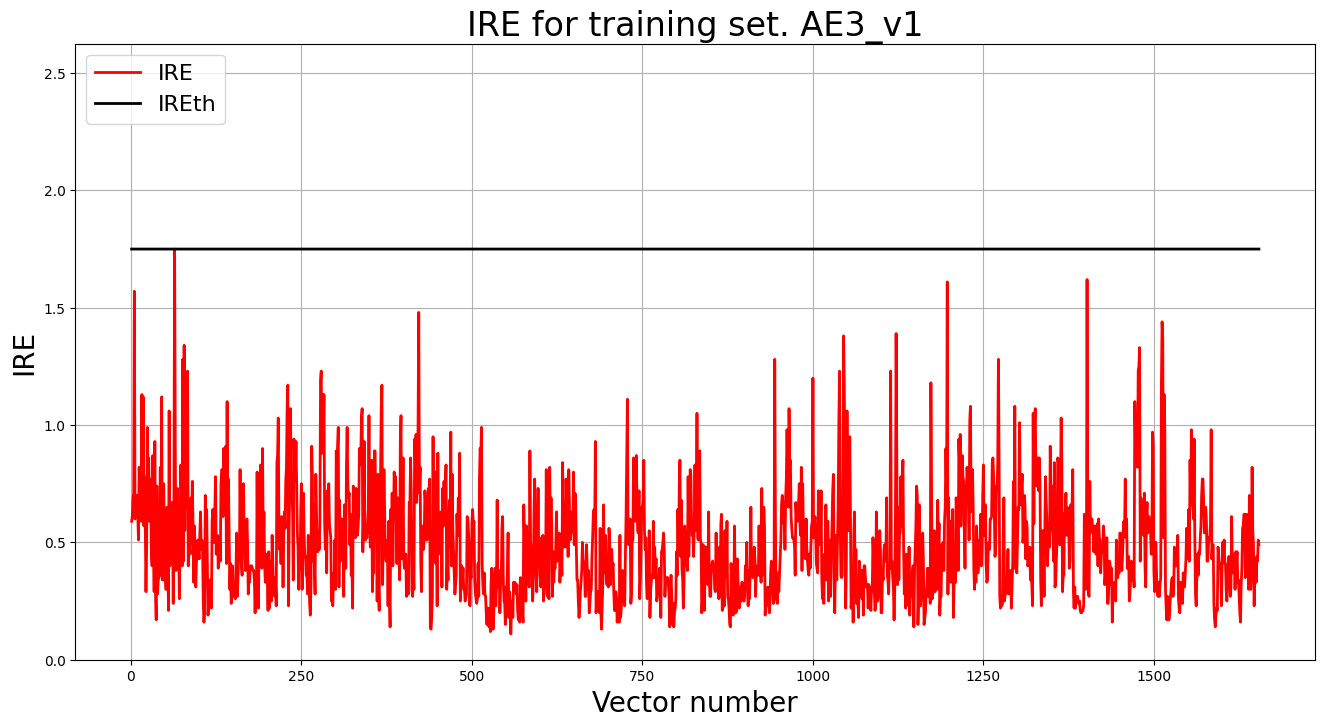

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('training', IRE3_v1, IREth3_v1, 'AE3_v1')

### 6) Сделать вывод о пригодности обученного автокодировщика для качественного обнаружения аномалий. Если порог ошибки реконструкции слишком велик, то подобрать подходящие параметры автокодировщика и повторить шаги (4) – (6).

In [ ]:
# **kwargs
# verbose_every_n_epochs - отображать прогресс каждые N эпох (по умолчанию - 1000)
# early_stopping_delta - дельта для ранней остановки (по умолчанию - 0.01)
# early_stopping_value = значение для ранней остановки (по умолчанию -  0.0001)

from time import time

patience = 4000
start = time()
ae3_v2_trained, IRE3_v2, IREth3_v2 = lib.create_fit_save_ae(train,'out/AE3_V2.h5','out/AE3_v2_ire_th.txt',
100000, False, patience, early_stopping_delta = 0.001)
print("Время на обучение: ", time() - start)

Задать архитектуру автокодировщиков или использовать архитектуру по умолчанию? (1/2): 1
Задайте количество скрытых слоёв (нечетное число) : 11
Задайте архитектуру скрытых слоёв автокодировщика, например, в виде 3 1 3 : 48 36 28 22 16 10 16 22 28 36 48

Epoch 1000/100000
 - loss: 0.0554

Epoch 2000/100000
 - loss: 0.0276

Epoch 3000/100000
 - loss: 0.0217

Epoch 4000/100000
 - loss: 0.0195

Epoch 5000/100000
 - loss: 0.0179

Epoch 6000/100000
 - loss: 0.0166

Epoch 7000/100000
 - loss: 0.0157

Epoch 8000/100000
 - loss: 0.0151

Epoch 9000/100000
 - loss: 0.0144

Epoch 10000/100000
 - loss: 0.0139

Epoch 11000/100000
 - loss: 0.0135

Epoch 12000/100000
 - loss: 0.0131

Epoch 13000/100000
 - loss: 0.0131

Epoch 14000/100000
 - loss: 0.0128

Epoch 15000/100000
 - loss: 0.0117

Epoch 16000/100000
 - loss: 0.0119

Epoch 17000/100000
 - loss: 0.0108

Epoch 18000/100000
 - loss: 0.0103

Epoch 19000/100000
 - loss: 0.0100

Epoch 20000/100000
 - loss: 0.0100

Epoch 21000/100000
 - loss: 0.0094





Время на обучение:  1065.6178832054138


Скрытых слоев 7, нейроны: 48->36->28->22->16->12->16->22->28->36->48

Ошибка MSE_AE3_v1 = 0.0098

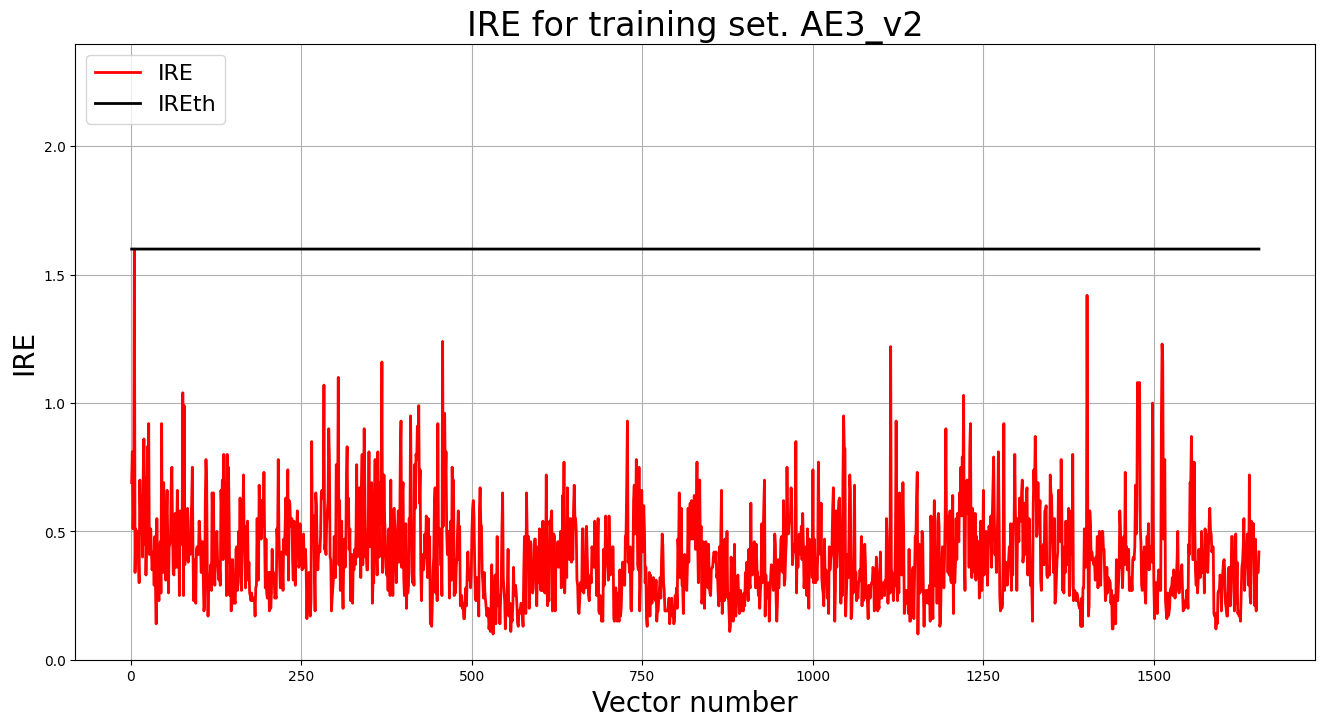

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('training', IRE3_v2, IREth3_v2, 'AE3_v2')

### 7) Изучить и загрузить тестовую выборку Cardio.txt.

In [ ]:
#загрузка тестовой выборки
test = np.loadtxt('data/cardio_test.txt', dtype=float)
print('\n test:\n', test)
print('test.shape:', np.shape(test))


 test:
 [[ 0.21654639 -0.65465178 -0.20364049 ... -2.0444214   4.987467
  -0.49329397]
 [ 0.21654639 -0.5653379  -0.20364049 ... -2.1133887   6.490482
  -0.49329397]
 [-0.3125388  -0.91998844  6.9653692  ... -1.1478471   3.9186563
  -0.49329397]
 ...
 [-0.41835583 -0.91998844 -0.16463485 ... -1.4926834   0.24461959
  -0.49329397]
 [-0.41835583 -0.91998844 -0.15093411 ... -1.4237162   0.14441859
  -0.49329397]
 [-0.41835583 -0.91998844 -0.20364049 ... -1.2857816   3.5846529
  -0.49329397]]
test.shape: (109, 21)


### 8) Подать тестовую выборку на вход обученного автокодировщика для обнаружения аномалий. Вывести график ошибки реконструкции элементов тестовой выборки относительно порога.

In [ ]:
# тестирование АE3
predicted_labels3_v1, ire3_v1 = lib.predict_ae(ae3_v1_trained, test, IREth3_v1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


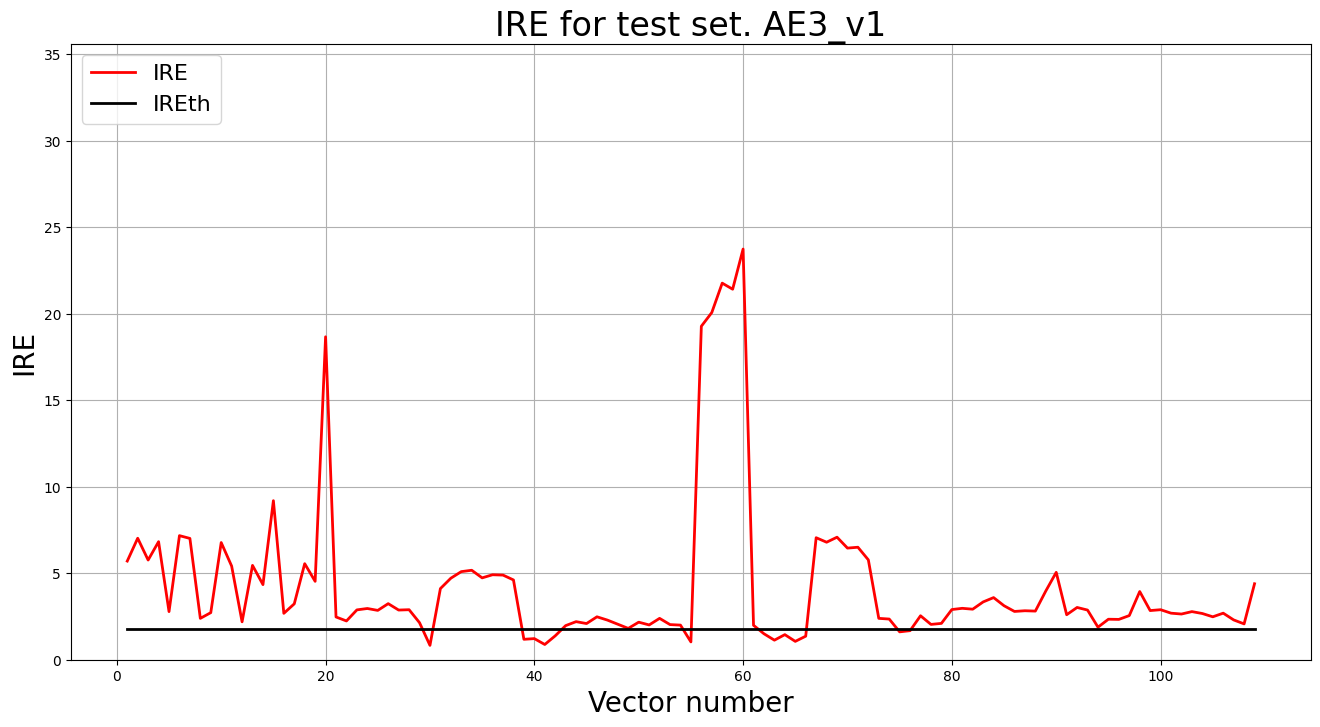

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('test', ire3_v1, IREth3_v1, 'AE3_v1')

In [ ]:
# тестирование АE3
predicted_labels3_v2, ire3_v2 = lib.predict_ae(ae3_v2_trained, test, IREth3_v2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


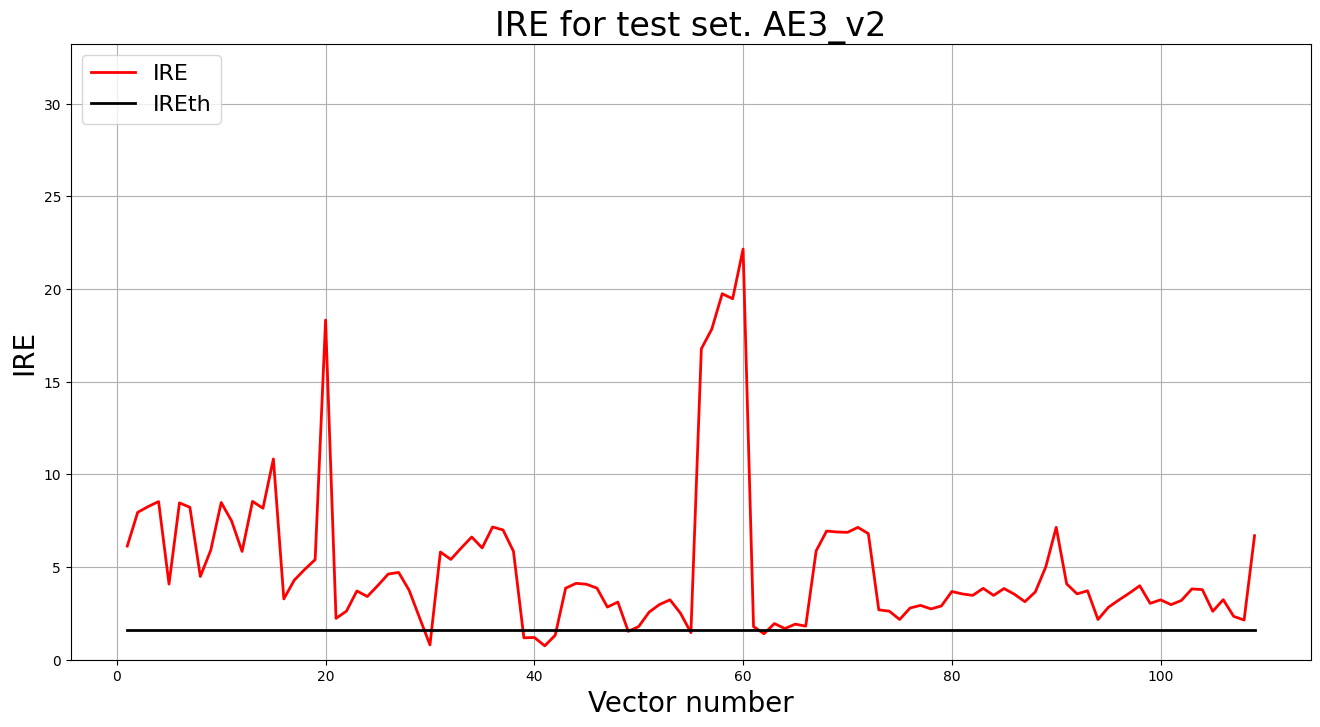

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('test', ire3_v2, IREth3_v2, 'AE3_v2')

In [ ]:
# тестирование АE2
lib.anomaly_detection_ae(predicted_labels3_v1, IRE3_v1, IREth3_v1)


i         Labels    IRE       IREth     
0         [1.]      0.59      1.75      
1         [1.]      0.61      1.75      
2         [1.]      0.69      1.75      
3         [1.]      0.71      1.75      
4         [1.]      1.57      1.75      
5         [1.]      0.6       1.75      
6         [1.]      0.68      1.75      
7         [1.]      0.66      1.75      
8         [1.]      0.7       1.75      
9         [1.]      0.62      1.75      
10        [1.]      0.51      1.75      
11        [1.]      0.82      1.75      
12        [1.]      0.75      1.75      
13        [1.]      0.63      1.75      
14        [1.]      0.59      1.75      
15        [1.]      1.13      1.75      
16        [1.]      0.66      1.75      
17        [1.]      1.12      1.75      
18        [1.]      0.57      1.75      
19        [1.]      0.78      1.75      
20        [1.]      0.57      1.75      
21        [1.]      0.29      1.75      
22        [1.]      0.48      1.75      
23        [1.] 

Для AE3_v1 точность составляет 88%

In [ ]:
# тестирование АE2
lib.anomaly_detection_ae(predicted_labels3_v2, IRE3_v2, IREth3_v2)


i         Labels    IRE       IREth     
0         [1.]      0.69      1.6       
1         [1.]      0.81      1.6       
2         [1.]      0.51      1.6       
3         [1.]      0.62      1.6       
4         [1.]      1.6       1.6       
5         [1.]      0.34      1.6       
6         [1.]      0.51      1.6       
7         [1.]      0.49      1.6       
8         [1.]      0.5       1.6       
9         [1.]      0.45      1.6       
10        [1.]      0.4       1.6       
11        [1.]      0.3       1.6       
12        [1.]      0.7       1.6       
13        [1.]      0.54      1.6       
14        [1.]      0.59      1.6       
15        [1.]      0.64      1.6       
16        [1.]      0.4       1.6       
17        [1.]      0.73      1.6       
18        [1.]      0.86      1.6       
19        [1.]      0.45      1.6       
20        [1.]      0.71      1.6       
21        [1.]      0.33      1.6       
22        [1.]      0.49      1.6       
23        [1.] 

Для AE3_v2 точность составляет 92%

### 9) Если результаты обнаружения аномалий не удовлетворительные (обнаружено менее 70% аномалий), то подобрать подходящие параметры автокодировщика и повторить шаги (4) – (9).

Результаты обнаружения аномалий удовлетворены.

### 10) Параметры наилучшего автокодировщика и результаты обнаружения аномалий занести в таблицу:
Табл. 2 Результаты задания №2

| Dataset name | Количество<br>скрытых слоев | Количество<br>нейронов в скрытых слоях | Количество<br>эпох обучения | Ошибка<br>MSE_stop | Порог ошибки<br>реконструкции | % обнаруженных<br>аномалий |
|:-------------|:-----------------------------|:----------------------------------------|:-----------------------------|:-------------------|:-------------------------------|:---------------------------|
| Cardio       | 11                             | 48, 36, 28, 22, 16, 10, 16, 22, 28, 36, 48              | 100000                      | 0.0098              | 1.6                           | 92%                      |


### 11) Сделать выводы о требованиях к:
- данным для обучения,
- архитектуре автокодировщика,  
- количеству эпох обучения,
- ошибке MSE_stop, приемлемой для останова обучения,
- ошибке реконструкции обучающей выборки (порогу обнаружения
аномалий)

для качественного обнаружения аномалий в случае, когда размерность
пространства признаков высока.

1) Данные для обучения должны быть без аномалий, чтобы автокодировщик смог рассчитать верное пороговое значение
2) Архитектура автокодировщика должна постепенно сужатся к бутылочному горлышку,а затем постепенно возвращатся к исходным выходным размерам, кол-во скрытых слоев 7-11.
3) В рамках данного набора данных оптимальное кол-во эпох 100000 с patience 4000 эпох
4) Оптимальная ошибка MSE-stop в районе 0.001, желательно не меньше для предотвращения переобучения
5) Значение порога не больше 1.6